# Qualitative_Bankruptcy database

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset and understand the features and target variable. 4 points

In [2]:
Bankruptcy_df = pd.read_csv("Qualitative_Bankruptcy.data.txt")

In [3]:
Bankruptcy_df.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [4]:
Bankruptcy_df.shape

(249, 7)

In [5]:
# Check for missing value
Bankruptcy_df.isna().sum()

P      0
P.1    0
A      0
A.1    0
A.2    0
P.2    0
NB     0
dtype: int64

In [6]:
# Check for missing value
Bankruptcy_df.isnull().sum()

P      0
P.1    0
A      0
A.1    0
A.2    0
P.2    0
NB     0
dtype: int64

In [7]:
Bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
P      249 non-null object
P.1    249 non-null object
A      249 non-null object
A.1    249 non-null object
A.2    249 non-null object
P.2    249 non-null object
NB     249 non-null object
dtypes: object(7)
memory usage: 13.7+ KB


In [8]:
for col in Bankruptcy_df.columns:
    print("Unique value of {}".format(col))
    print(Bankruptcy_df[col].unique())
    print("\n")

Unique value of P
['N' 'A' 'P']


Unique value of P.1
['N' 'A' 'P']


Unique value of A
['A' 'P' 'N']


Unique value of A.1
['A' 'P' 'N']


Unique value of A.2
['A' 'P' 'N']


Unique value of P.2
['N' 'A' 'P']


Unique value of NB
['NB' 'B']




In [9]:
# Check any special character present in dataframe

In [10]:
from string import punctuation
lst = list(punctuation)
Bankruptcy_df.isin(lst).any()

P      False
P.1    False
A      False
A.1    False
A.2    False
P.2    False
NB     False
dtype: bool

In [11]:
Bankruptcy_df.shape

(249, 7)

# 2. Encode independent features. 4 points

In [12]:
ind_feature = ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']

In [13]:
ind_feature

['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2']

#### Apply Label Encoding

In [14]:
from sklearn import preprocessing

In [15]:
Le = preprocessing.LabelEncoder()

In [16]:
Bankruptcy_df["P"] = Le.fit_transform(Bankruptcy_df["P"])
Bankruptcy_df["P.1"] = Le.fit_transform(Bankruptcy_df["P.1"])
Bankruptcy_df["A"] = Le.fit_transform(Bankruptcy_df["A"])
Bankruptcy_df["A.1"] = Le.fit_transform(Bankruptcy_df["A.1"])
Bankruptcy_df["A.2"] = Le.fit_transform(Bankruptcy_df["A.2"])
Bankruptcy_df["P.2"] = Le.fit_transform(Bankruptcy_df["P.2"])

#### After label encoding we need to create dummy variable for all categorical variable. Here dummy varibale is created for independent variables.
#### sklearn.preprocessing.OneHotEncoder can also be used here.

In [17]:
Bankruptcy_df = pd.get_dummies(Bankruptcy_df, columns=ind_feature)

In [18]:
Bankruptcy_df.head()

,NB,P_0,P_1,P_2,P.1_0,P.1_1,P.1_2,A_0,A_1,A_2,A.1_0,A.1_1,A.1_2,A.2_0,A.2_1,A.2_2,P.2_0,P.2_1,P.2_2
0,NB,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,NB,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,NB,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,NB,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,NB,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0


In [19]:
Bankruptcy_df.shape

(249, 19)

# 3. Separate the dependant variable from the rest of the train data 2 point

In [20]:
X = Bankruptcy_df.drop(["NB"], axis=1)
Y = Bankruptcy_df["NB"]

In [21]:
X.head()

,P_0,P_1,P_2,P.1_0,P.1_1,P.1_2,A_0,A_1,A_2,A.1_0,A.1_1,A.1_2,A.2_0,A.2_1,A.2_2,P.2_0,P.2_1,P.2_2
0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0


# 4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

# 5. Apply PCA on the independent features of train data. 2 point

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA()

In [26]:
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [27]:
X_pca.shape

(199, 18)

In [28]:
X_pca = pd.DataFrame(X_pca)

In [29]:
pca.explained_variance_ratio_

array([2.77568833e-01, 1.18832108e-01, 9.74884100e-02, 9.34711624e-02,
       8.16595187e-02, 7.86419665e-02, 7.04937027e-02, 5.24638186e-02,
       4.48183971e-02, 4.39812946e-02, 2.74008333e-02, 1.31799557e-02,
       7.59203579e-33, 5.57992763e-33, 3.99112258e-33, 2.68089043e-33,
       1.68643927e-33, 1.15085295e-33])

# 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points

In [30]:
# all pca components
pca.components_

array([[-0.07369505,  0.18337561, -0.10968056, -0.10562332,  0.28138969,
        -0.17576636, -0.24928644,  0.40283736, -0.15355092, -0.12049711,
         0.37063141, -0.2501343 , -0.14736492,  0.43401541, -0.28665049,
         0.00217275,  0.18992023, -0.19209298],
       [ 0.49079118, -0.43097722, -0.05981396,  0.39837065, -0.3168802 ,
        -0.08149045, -0.11721128,  0.22623217, -0.10902089, -0.17573883,
         0.18805977, -0.01232094, -0.128102  ,  0.10040124,  0.02770076,
         0.23518882, -0.27667933,  0.04149051],
       [-0.14001695, -0.15715418,  0.29717113,  0.24390938, -0.18986885,
        -0.05404054, -0.21582101, -0.04507204,  0.26089305,  0.09938719,
         0.03919423, -0.13858142, -0.36190955, -0.01803736,  0.37994691,
        -0.14127777,  0.46814861, -0.32687083],
       [ 0.1857113 ,  0.31277115, -0.49848246,  0.1321515 ,  0.19963221,
        -0.33178371, -0.00680608, -0.10054819,  0.10735427,  0.10244663,
        -0.21195348,  0.10950685, -0.11895056, -0.107

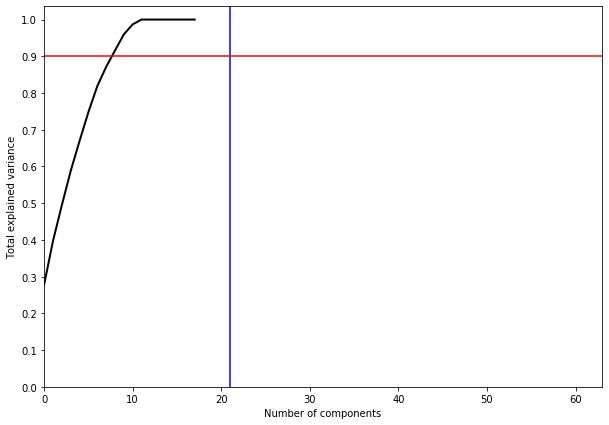

In [31]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [32]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
print("Number of components required for explaing 95% of varicance: {}".format(d))

Number of components required for explaing 95% of varicance: 10


From above plotted elbow method and from pca.explained_variance_ratio_ it can be concluded that 10 pca components is able to explain 95% variance.

# 7. Transform the data using PCA ( select optimum number of PCs). 4 points

In [33]:
reduced_pca = PCA(n_components=10)
X_train_pca = reduced_pca.fit_transform(X_train)

In [34]:
reduced_pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
reduced_pca.explained_variance_ratio_

array([0.27756883, 0.11883211, 0.09748841, 0.09347116, 0.08165952,
       0.07864197, 0.0704937 , 0.05246382, 0.0448184 , 0.04398129])

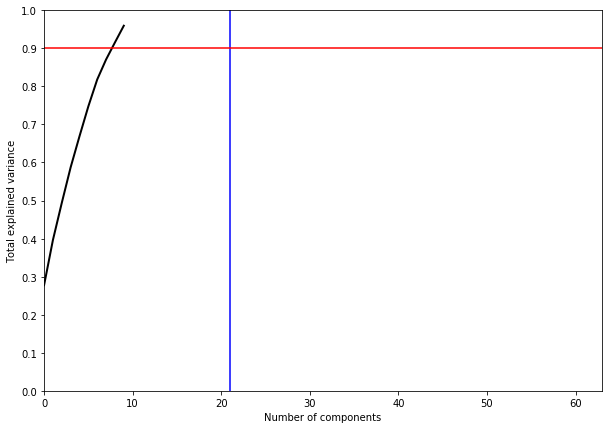

In [36]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(reduced_pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [37]:
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.986683,1.182934,0.504787,-0.100234,-0.115930,0.692377,-0.278331,-0.152450,0.433918,-0.298556
1,-0.355568,0.020091,-0.199518,0.619710,-0.786220,0.012173,0.669951,-0.114161,-0.572641,1.348753
2,-1.098884,1.086468,0.421535,1.164488,-0.463605,-0.177486,0.291649,0.569045,0.191693,0.094432
3,1.248754,-0.135916,-0.741148,-0.260045,-0.138209,-0.588808,0.591967,-0.445064,0.254725,-0.158345
4,0.950698,0.632329,0.941975,-0.784428,-0.130371,-0.071496,-0.545104,-0.073260,0.536685,0.256689


In [38]:
X_train_pca.shape

(199, 10)

# 8. Apply KMeans algorithm on the above transformed data. 6 points

In [39]:
from sklearn.cluster import KMeans

In [40]:
cluster_error = []
cluster_range = range(1,11)

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init=5, max_iter=500)
    clusters.fit(X_train_pca)
    centorid = clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)

cluster_df = pd.DataFrame({"num_cluster":cluster_range, "cluster_error": cluster_error})
cluster_df

,num_cluster,cluster_error
0,1,742.127634
1,2,551.320048
2,3,498.807928
3,4,454.523980
4,5,416.819299
5,6,392.385403
6,7,373.320444
7,8,358.954422
8,9,331.604079
9,10,318.606390


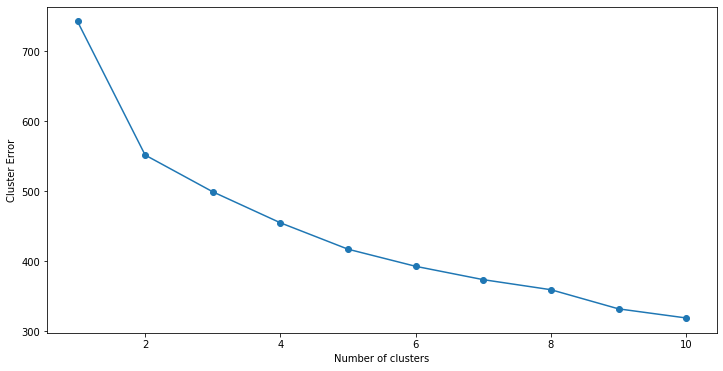

In [41]:
# plot cluster error
plt.figure(figsize=(12,6))
plt.plot(cluster_df["num_cluster"], cluster_df["cluster_error"], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Cluster Error")
plt.show()

# 9. Select optimal number of clusters and form clusters out of the train data. 10 points

### For finding optimal number of clusters we can use elbow and silhouette score 

In [42]:
# Number of cluster and cluster error
cluster_df = pd.DataFrame({"num_cluster":cluster_range, "cluster_error": cluster_error})
cluster_df

,num_cluster,cluster_error
0,1,742.127634
1,2,551.320048
2,3,498.807928
3,4,454.523980
4,5,416.819299
5,6,392.385403
6,7,373.320444
7,8,358.954422
8,9,331.604079
9,10,318.606390


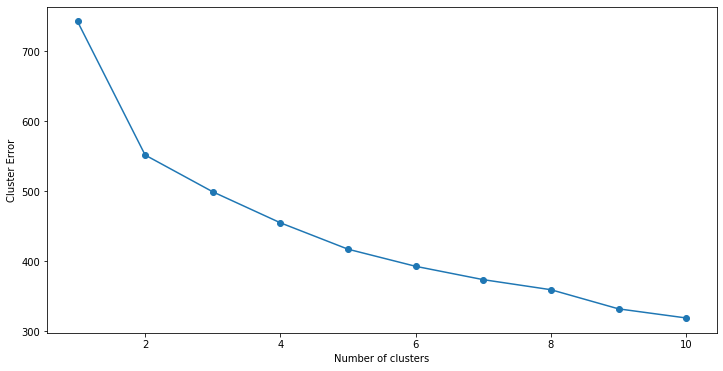

In [43]:
# Elbow method
plt.figure(figsize=(12,6))
plt.plot(cluster_df["num_cluster"], cluster_df["cluster_error"], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Cluster Error")
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2440833056149466
For n_clusters = 2 Number of negative silhouette_score is : 3


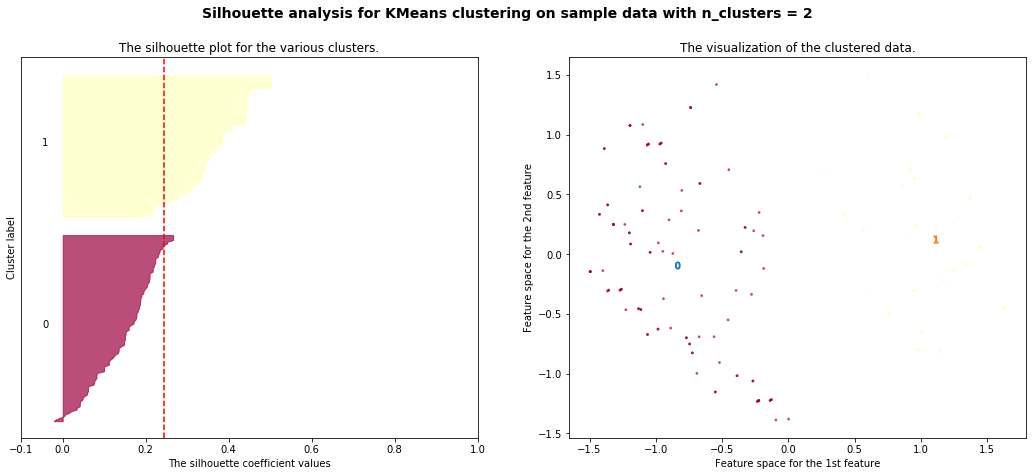

For n_clusters = 3 The average silhouette_score is : 0.24028137962228285
For n_clusters = 3 Number of negative silhouette_score is : 1


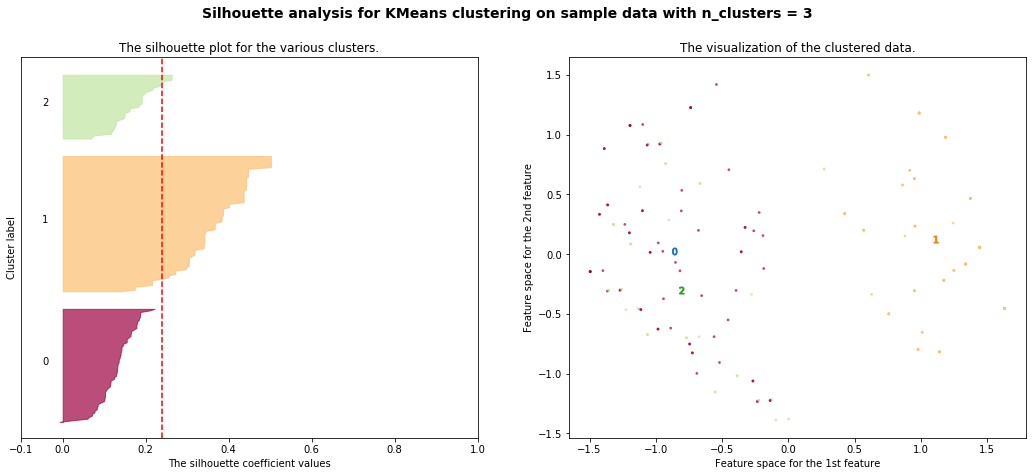

For n_clusters = 4 The average silhouette_score is : 0.23346991347050353
For n_clusters = 4 Number of negative silhouette_score is : 1


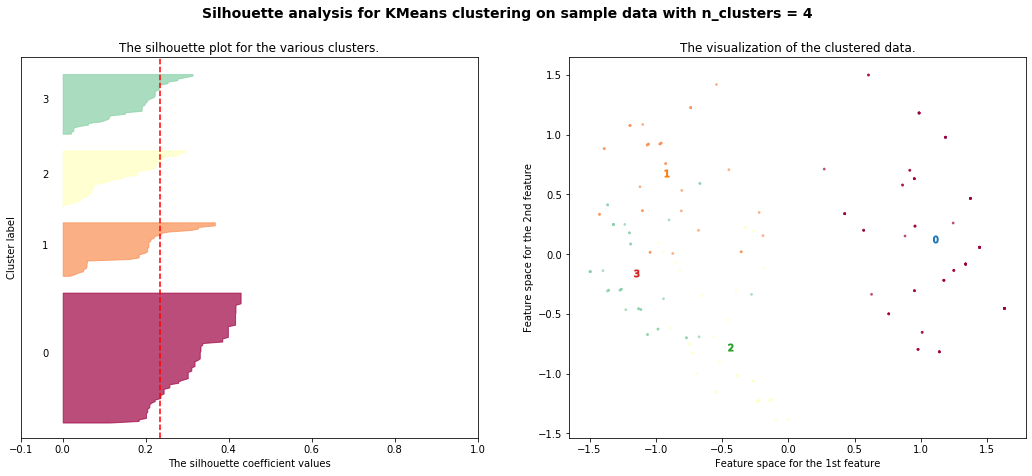

For n_clusters = 5 The average silhouette_score is : 0.18827180949580366
For n_clusters = 5 Number of negative silhouette_score is : 3


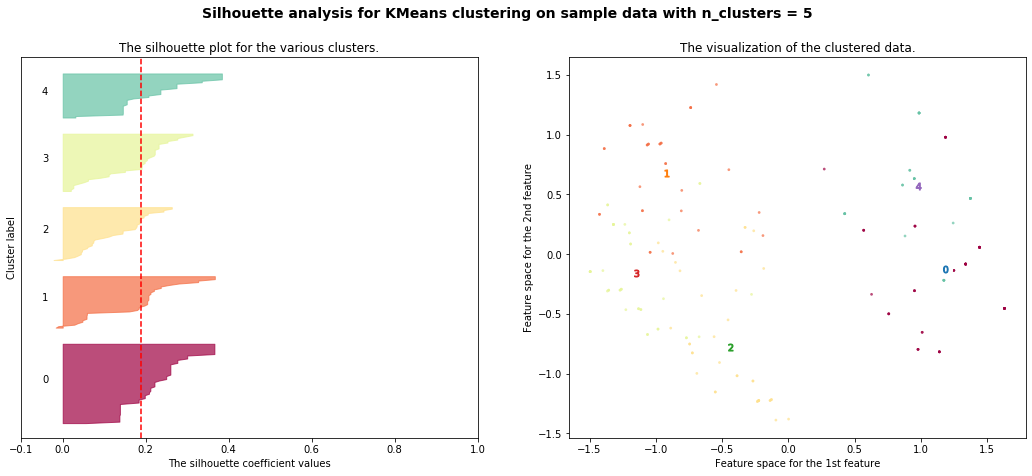

For n_clusters = 6 The average silhouette_score is : 0.19682005653169599
For n_clusters = 6 Number of negative silhouette_score is : 2


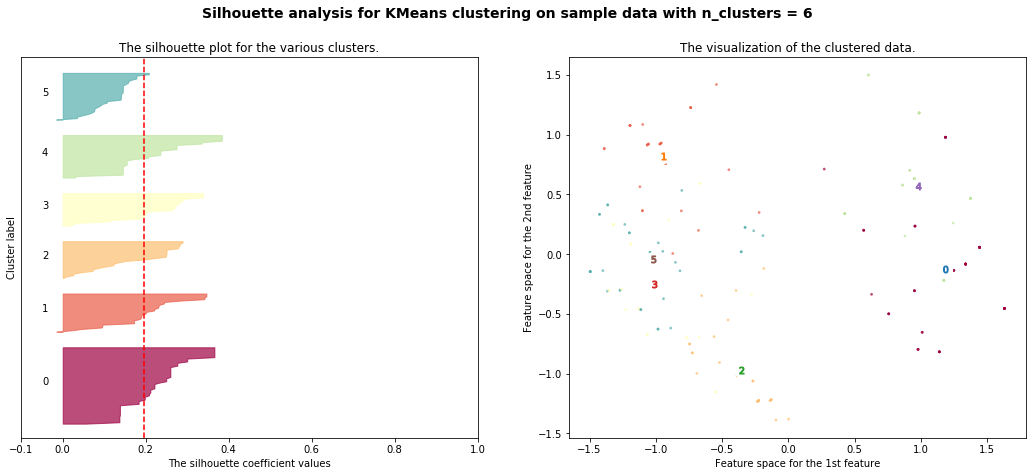

For n_clusters = 7 The average silhouette_score is : 0.22084219833105057
For n_clusters = 7 Number of negative silhouette_score is : 2


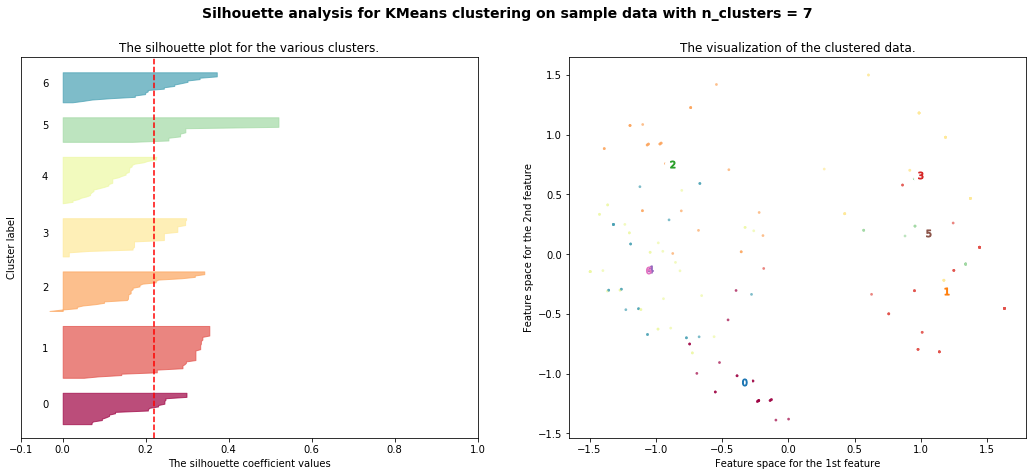

For n_clusters = 8 The average silhouette_score is : 0.205218603506879
For n_clusters = 8 Number of negative silhouette_score is : 2


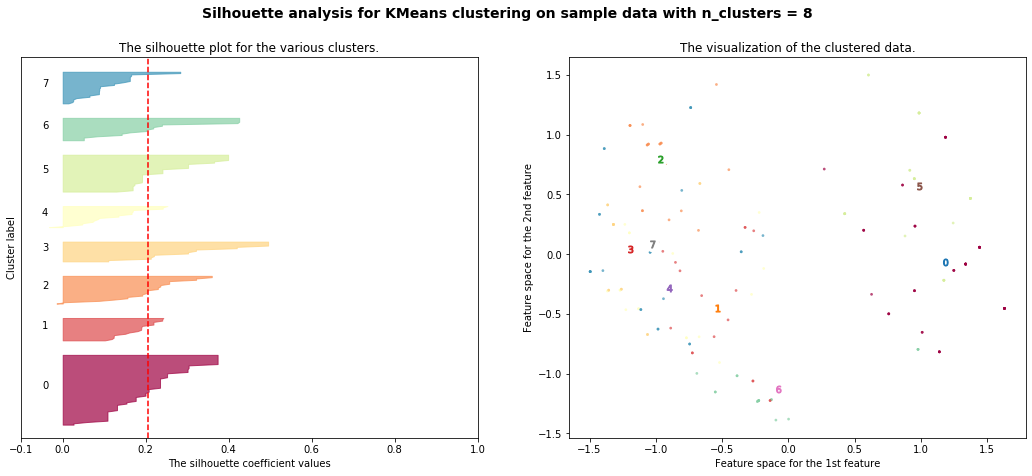

For n_clusters = 9 The average silhouette_score is : 0.22334615356759815
For n_clusters = 9 Number of negative silhouette_score is : 7


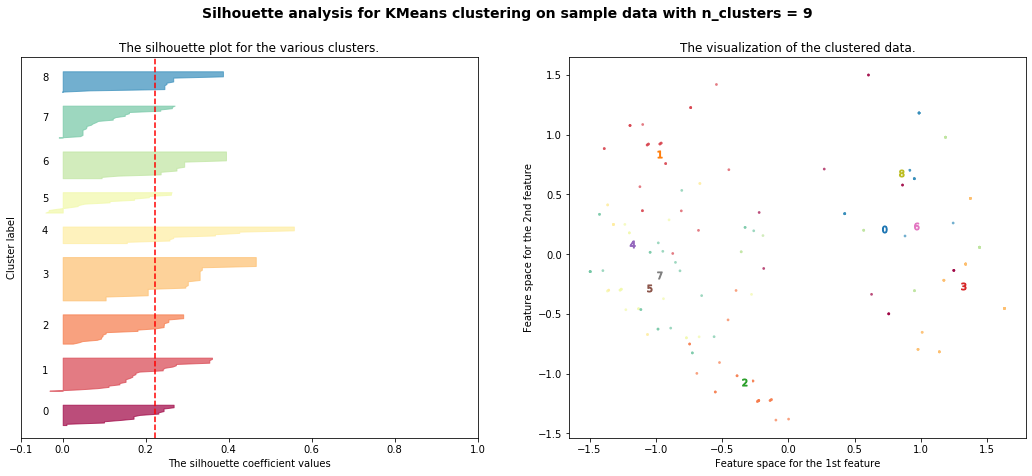

For n_clusters = 10 The average silhouette_score is : 0.2312927953584074
For n_clusters = 10 Number of negative silhouette_score is : 4


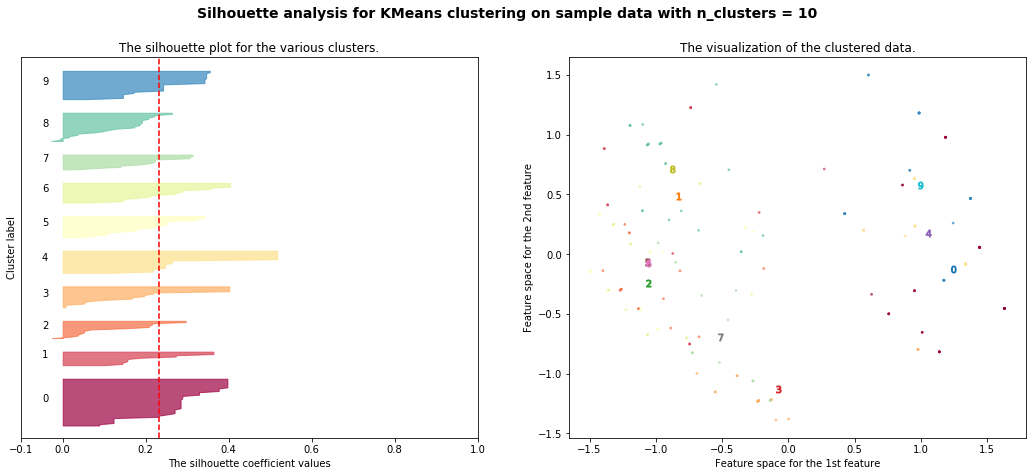

In [44]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_train_pca.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    neg_silhouette_score = 0

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=500)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    for sc in sample_silhouette_values:
        if sc < 0:
            neg_silhouette_score = neg_silhouette_score +1
    
    print("For n_clusters =", n_clusters,
          "Number of negative silhouette_score is :", neg_silhouette_score)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### From silhouette score and elbow method it can be concluded that optimal number of cluster is 2.
### For n_clusters = 2 and n_clusters = 3 the average silhouette_score is similar, still n_cluster = 2 can be considered as optimal because:
1) The difference in number of outlier for n_cluster = 2 and n_cluster = 3 is very less. For n_clusters = 2, number of negative silhouette_score is : 3 and for n_clusters = 3 Number of negative silhouette_score is : 1

2) Difference in silhouette score in both case is marginal, and hence I am considering n_cluster=2 as better. If we consider n_cluster = 3 as optimal, their will be not difference on SVC performance.

3) One can also argue that n_cluster = 2 will be computationally better, hence I am considering n_cluster=2 as optimal.

In [45]:
# Train final KMean model with optimal number of cluster.

In [46]:
kmean_optimal = KMeans(n_clusters=2, max_iter=500)
#kmean_optimal = KMeans(n_clusters=3, max_iter=500)
kmean_optimal.fit(X_train_pca)
prediction = kmean_optimal.predict(X_train_pca)
prediction

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0])

# 10. Create a new column in the train data and populate it with the cluster labels. 4 points

In [47]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.986683,1.182934,0.504787,-0.100234,-0.115930,0.692377,-0.278331,-0.152450,0.433918,-0.298556
1,-0.355568,0.020091,-0.199518,0.619710,-0.786220,0.012173,0.669951,-0.114161,-0.572641,1.348753
2,-1.098884,1.086468,0.421535,1.164488,-0.463605,-0.177486,0.291649,0.569045,0.191693,0.094432
3,1.248754,-0.135916,-0.741148,-0.260045,-0.138209,-0.588808,0.591967,-0.445064,0.254725,-0.158345
4,0.950698,0.632329,0.941975,-0.784428,-0.130371,-0.071496,-0.545104,-0.073260,0.536685,0.256689


In [48]:
X_train_pca['PredictedLabel'] = prediction
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,PredictedLabel
0,0.986683,1.182934,0.504787,-0.100234,-0.115930,0.692377,-0.278331,-0.152450,0.433918,-0.298556,1
1,-0.355568,0.020091,-0.199518,0.619710,-0.786220,0.012173,0.669951,-0.114161,-0.572641,1.348753,0
2,-1.098884,1.086468,0.421535,1.164488,-0.463605,-0.177486,0.291649,0.569045,0.191693,0.094432,0
3,1.248754,-0.135916,-0.741148,-0.260045,-0.138209,-0.588808,0.591967,-0.445064,0.254725,-0.158345,1
4,0.950698,0.632329,0.941975,-0.784428,-0.130371,-0.071496,-0.545104,-0.073260,0.536685,0.256689,1


#### Plot pairplot and boxplot after merging "PredictedLabel" for visualizing clusters

C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


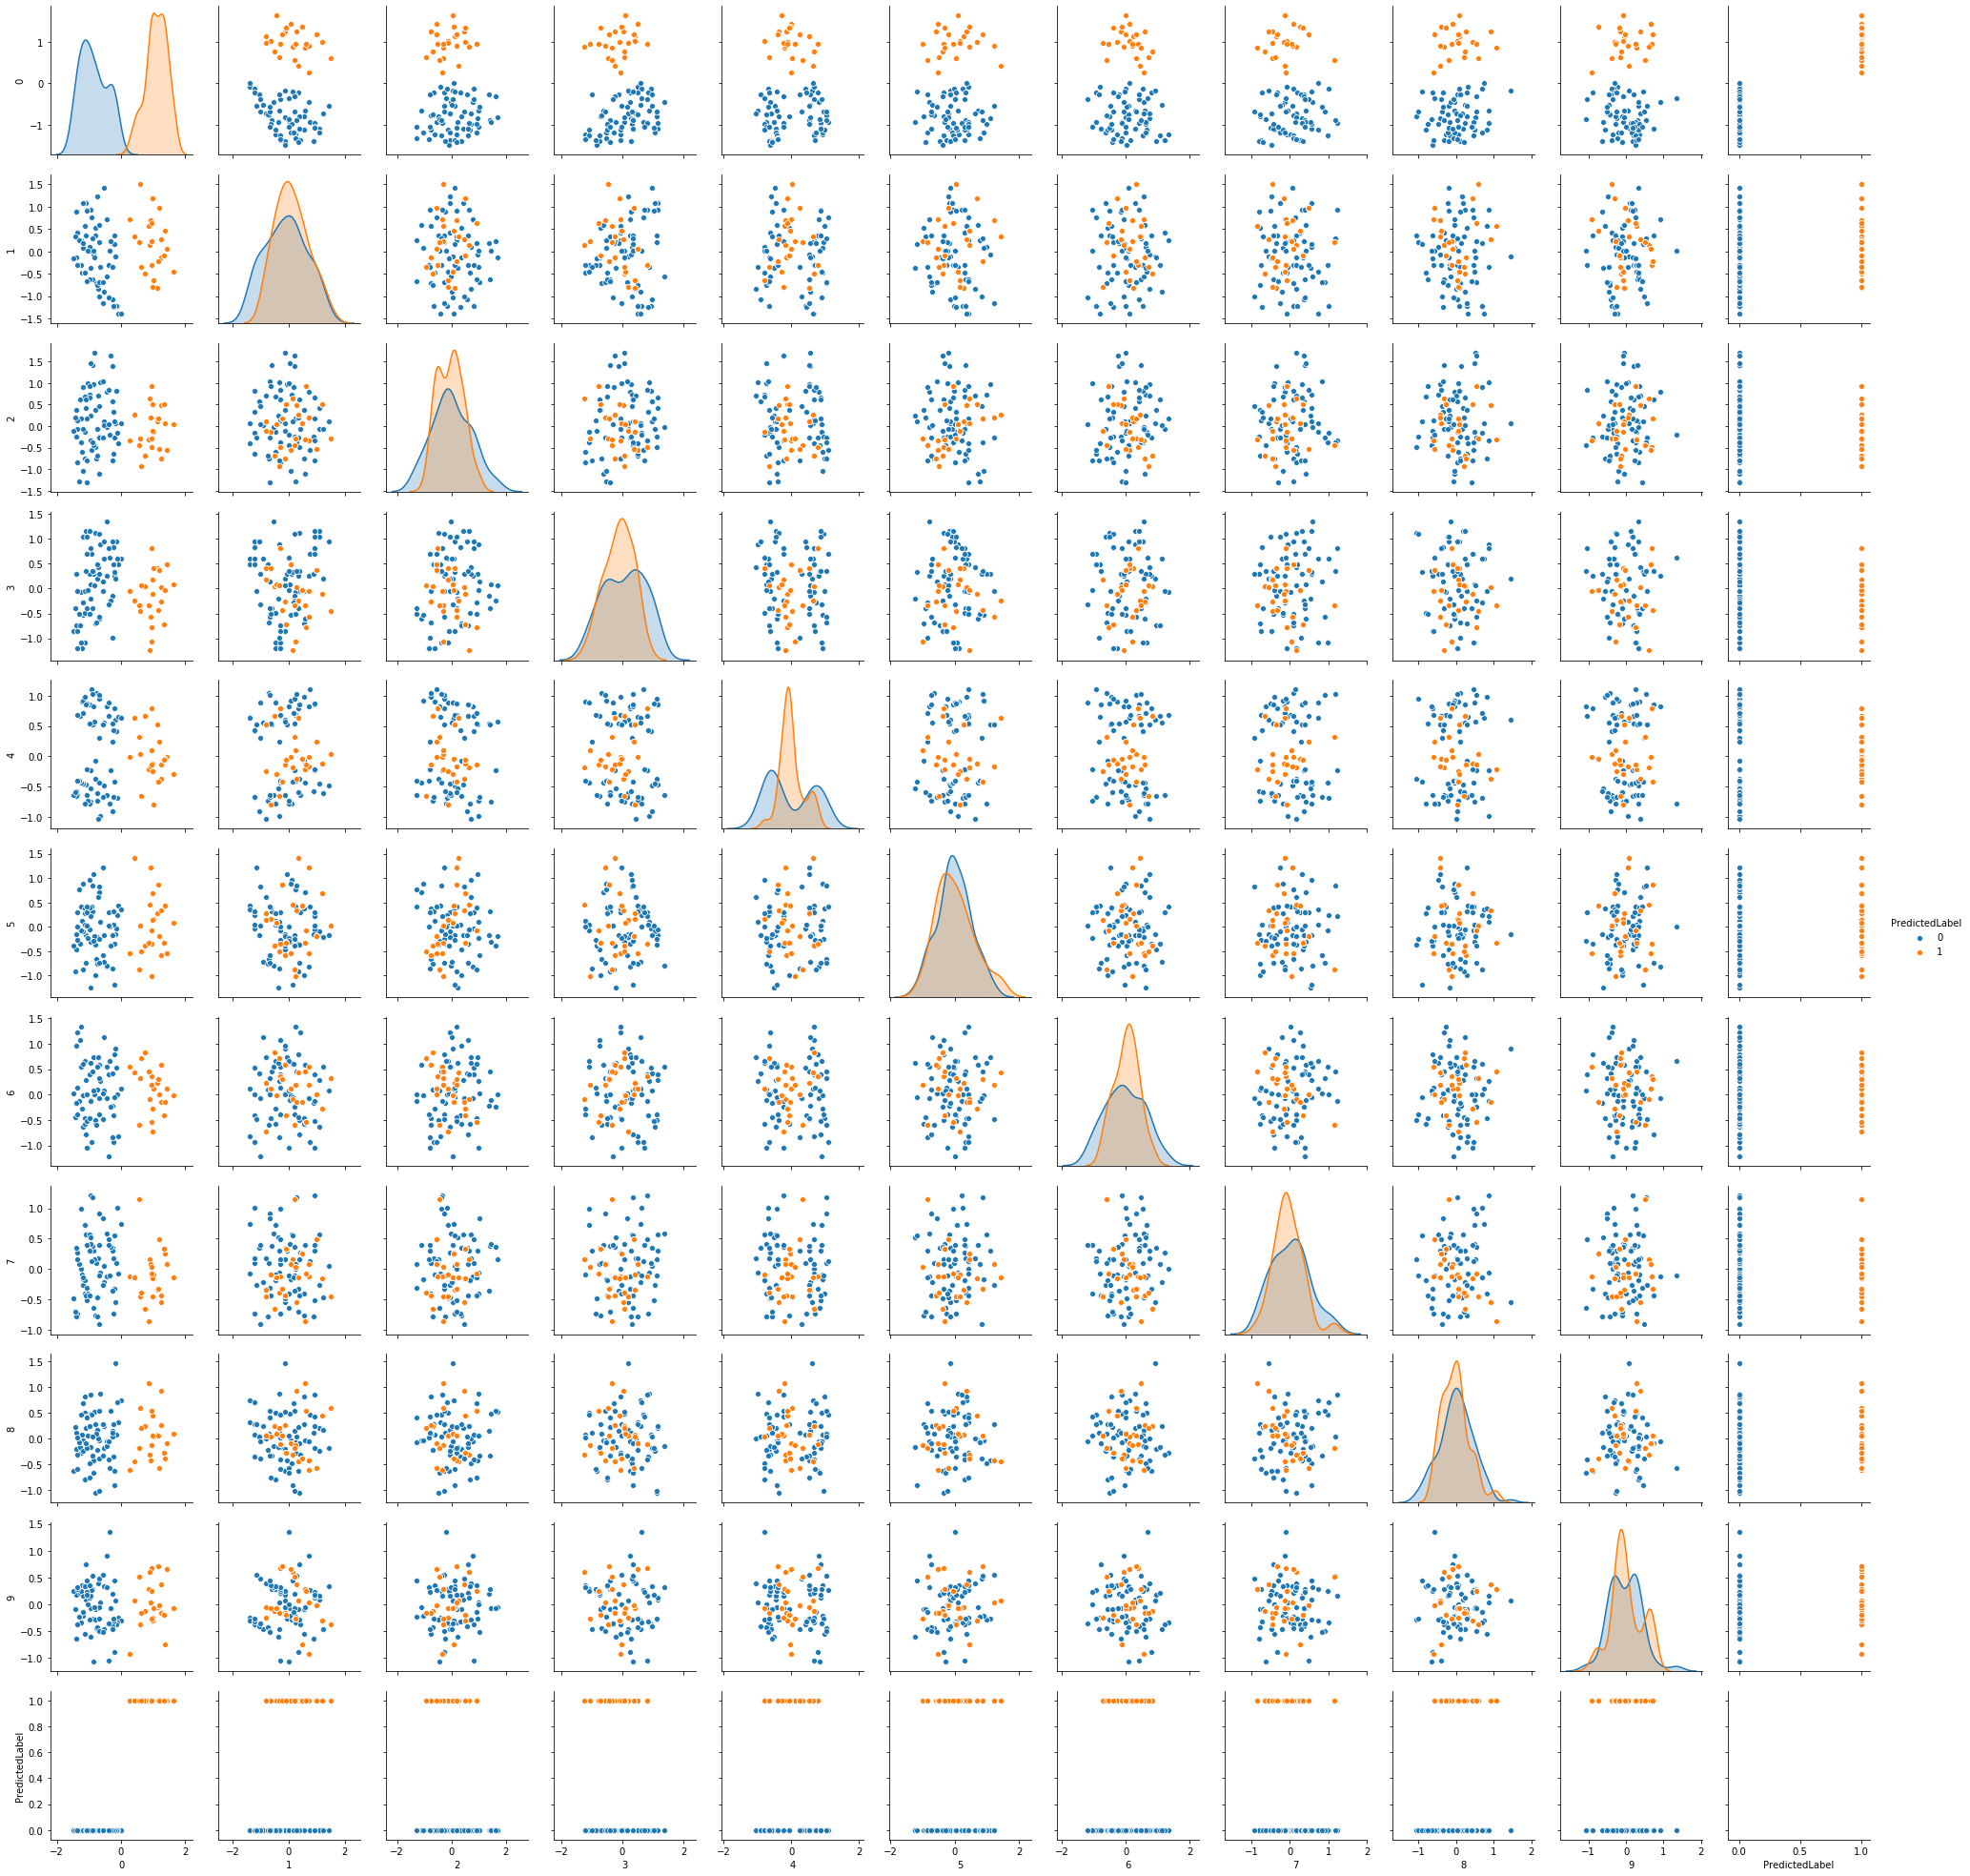

In [49]:
sns.pairplot(X_train_pca, diag_kind="kde",hue="PredictedLabel")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001876A602F98>,
      dtype=object)

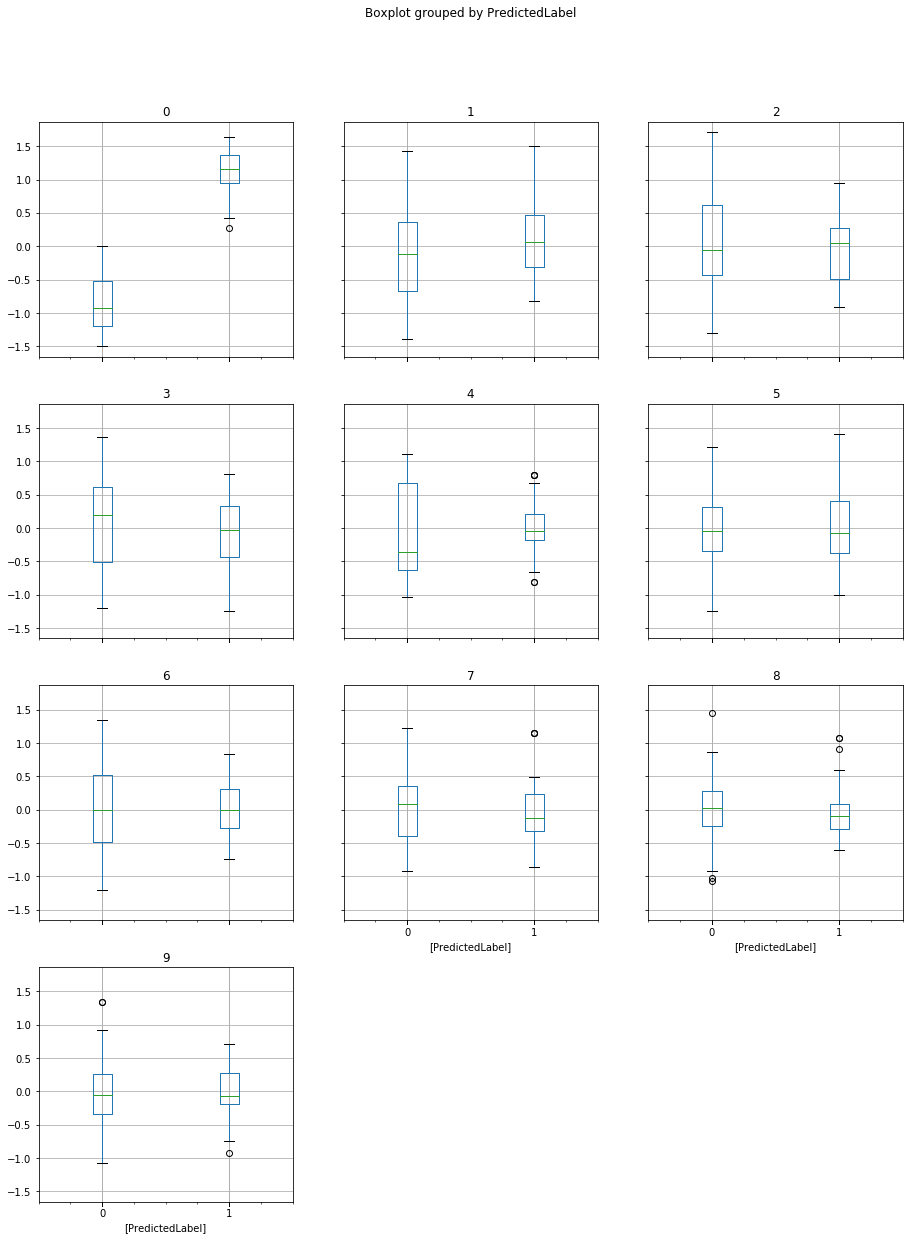

In [50]:
X_train_pca.boxplot(by="PredictedLabel", layout=(4,3), figsize=(15,20))

### From pairplot and boxplot we can conclude that clusters are overlapping. This may be due to overfitting. 

# 11. Transform the test data using the same PCA object that was fit on the train data. 4 points

In [51]:
X_test.head()

,P_0,P_1,P_2,P.1_0,P.1_1,P.1_2,A_0,A_1,A_2,A.1_0,A.1_1,A.1_2,A.2_0,A.2_1,A.2_2,P.2_0,P.2_1,P.2_2
67,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0
248,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
211,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
161,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
91,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0


In [52]:
X_test_pca = reduced_pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.887628,-0.619284,1.408168,-0.391582,0.518460,0.325482,0.464864,0.387410,-0.334254,0.292856
1,0.568583,0.200443,-0.445101,-0.327253,0.320878,-0.870605,-0.598225,1.145997,-0.196514,0.516207
2,1.337711,-0.082922,0.508197,-0.716947,-0.051812,-0.331875,-0.408666,0.339144,-0.288506,-0.188722
3,0.762950,1.144197,0.332549,-0.383546,0.144493,-0.698975,-0.404696,0.155235,0.349066,0.980545
4,-0.155483,0.706470,-0.318209,1.024066,-0.407466,-0.420280,0.216119,0.470204,-1.021080,-0.109150


# 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points

In [53]:
x_test_prediction = kmean_optimal.predict(X_test_pca)

In [54]:
x_test_prediction

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [55]:
X_test_pca["PredictedLabel"] = x_test_prediction

In [56]:
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,PredictedLabel
0,-0.887628,-0.619284,1.408168,-0.391582,0.518460,0.325482,0.464864,0.387410,-0.334254,0.292856,0
1,0.568583,0.200443,-0.445101,-0.327253,0.320878,-0.870605,-0.598225,1.145997,-0.196514,0.516207,1
2,1.337711,-0.082922,0.508197,-0.716947,-0.051812,-0.331875,-0.408666,0.339144,-0.288506,-0.188722,1
3,0.762950,1.144197,0.332549,-0.383546,0.144493,-0.698975,-0.404696,0.155235,0.349066,0.980545,1
4,-0.155483,0.706470,-0.318209,1.024066,-0.407466,-0.420280,0.216119,0.470204,-1.021080,-0.109150,0


#### Plot pairplot and boxplot after merging "PredictedLabel" for visualizing clusters

C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


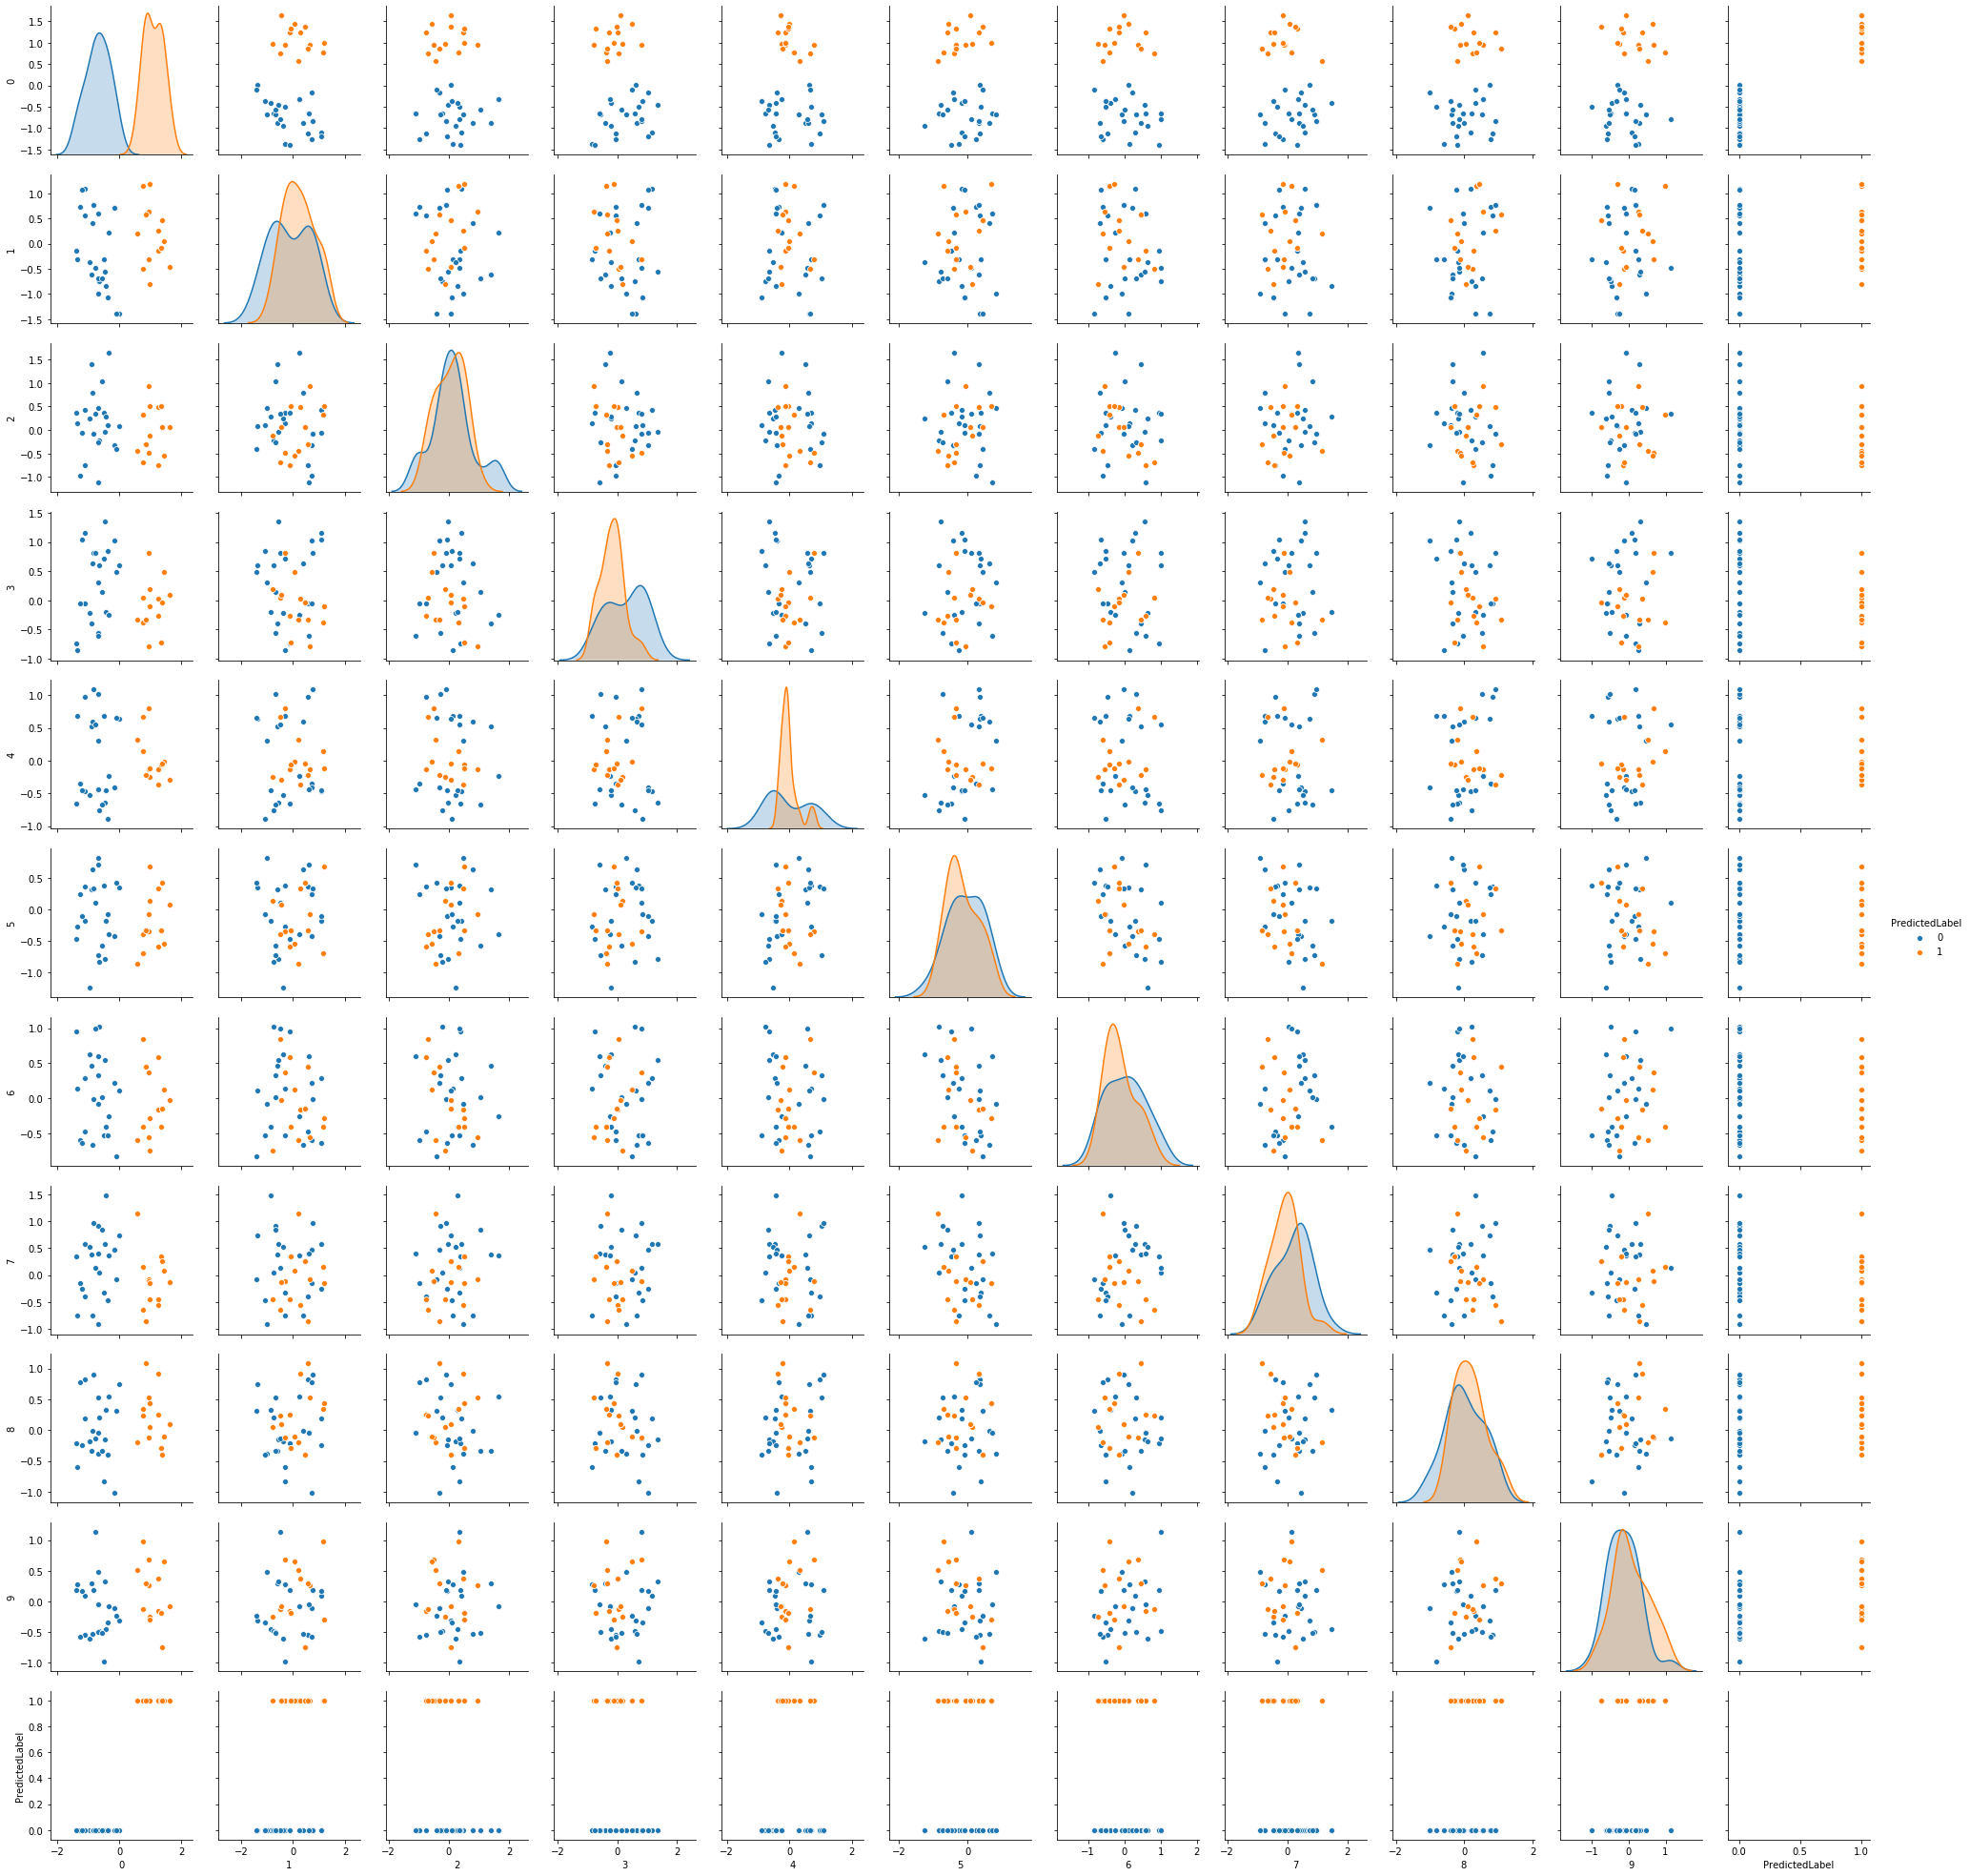

In [57]:
sns.pairplot(X_test_pca, diag_kind="kde", hue="PredictedLabel")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018771994278>,
      dtype=object)

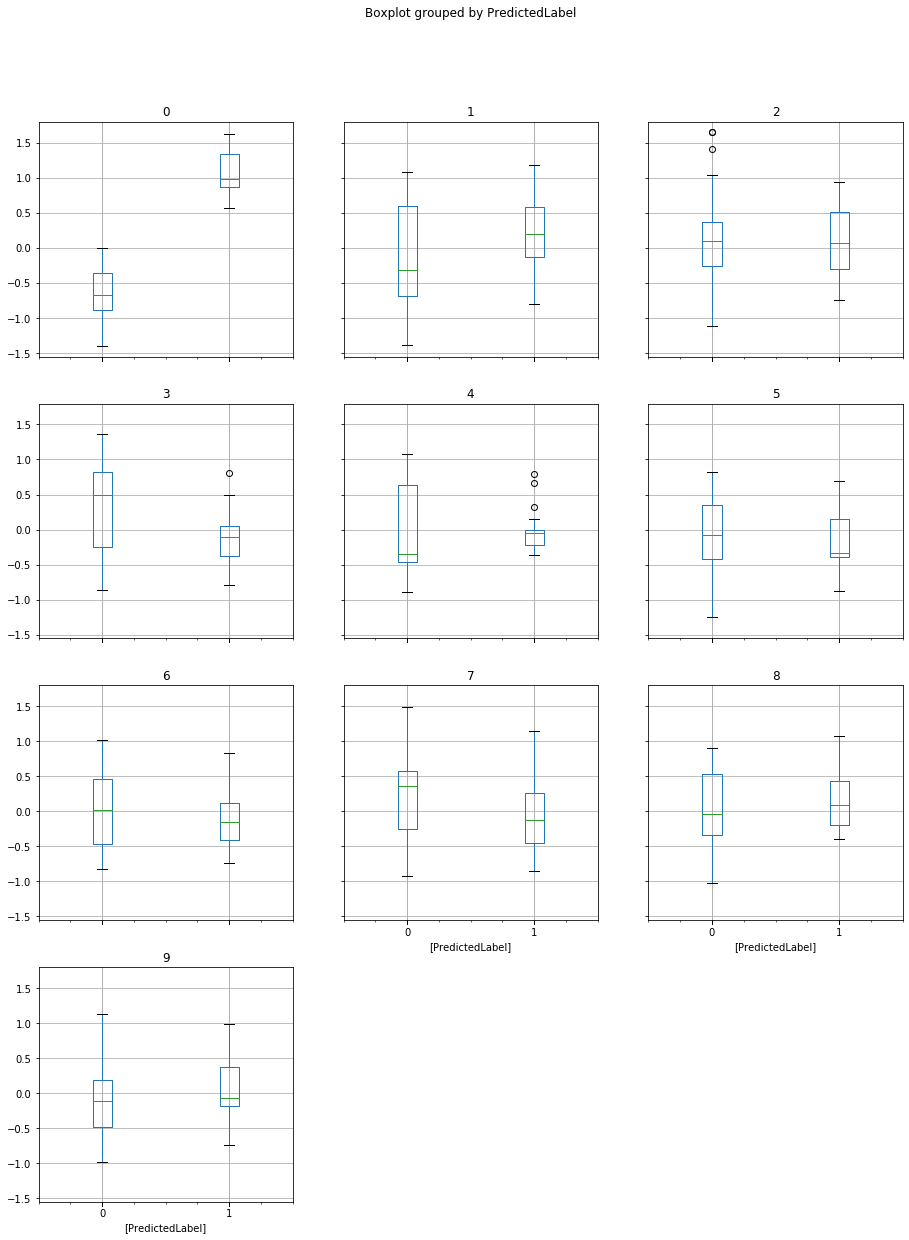

In [58]:
X_test_pca.boxplot(by="PredictedLabel", layout=(4,3), figsize=(15,20))

### From pairplot and boxplot we can conclude that clusters are overlapping. Similar observation seen while training.

# 13. Apply SVC model on train dataset and predict target for test dataset. 6 points

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [60]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,PredictedLabel
0,0.986683,1.182934,0.504787,-0.100234,-0.115930,0.692377,-0.278331,-0.152450,0.433918,-0.298556,1
1,-0.355568,0.020091,-0.199518,0.619710,-0.786220,0.012173,0.669951,-0.114161,-0.572641,1.348753,0
2,-1.098884,1.086468,0.421535,1.164488,-0.463605,-0.177486,0.291649,0.569045,0.191693,0.094432,0
3,1.248754,-0.135916,-0.741148,-0.260045,-0.138209,-0.588808,0.591967,-0.445064,0.254725,-0.158345,1
4,0.950698,0.632329,0.941975,-0.784428,-0.130371,-0.071496,-0.545104,-0.073260,0.536685,0.256689,1


### "PredictedLabel": is included in X_train_pca and X_test_pca, which needs to be dropped before training SVC model.

In [61]:
# Drop "PredictedLabel" from X_train_pca
X_train_pca = X_train_pca.drop(["PredictedLabel"],axis=1)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.986683,1.182934,0.504787,-0.100234,-0.115930,0.692377,-0.278331,-0.152450,0.433918,-0.298556
1,-0.355568,0.020091,-0.199518,0.619710,-0.786220,0.012173,0.669951,-0.114161,-0.572641,1.348753
2,-1.098884,1.086468,0.421535,1.164488,-0.463605,-0.177486,0.291649,0.569045,0.191693,0.094432
3,1.248754,-0.135916,-0.741148,-0.260045,-0.138209,-0.588808,0.591967,-0.445064,0.254725,-0.158345
4,0.950698,0.632329,0.941975,-0.784428,-0.130371,-0.071496,-0.545104,-0.073260,0.536685,0.256689


In [62]:
# Drop "PredictedLabel" from X_test_pca
X_test_pca = X_test_pca.drop(["PredictedLabel"], axis=1)
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.887628,-0.619284,1.408168,-0.391582,0.518460,0.325482,0.464864,0.387410,-0.334254,0.292856
1,0.568583,0.200443,-0.445101,-0.327253,0.320878,-0.870605,-0.598225,1.145997,-0.196514,0.516207
2,1.337711,-0.082922,0.508197,-0.716947,-0.051812,-0.331875,-0.408666,0.339144,-0.288506,-0.188722
3,0.762950,1.144197,0.332549,-0.383546,0.144493,-0.698975,-0.404696,0.155235,0.349066,0.980545
4,-0.155483,0.706470,-0.318209,1.024066,-0.407466,-0.420280,0.216119,0.470204,-1.021080,-0.109150


In [63]:
y_train = Le.fit_transform(y_train)
y_train

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1])

In [64]:
y_test = Le.fit_transform(y_test)
y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [65]:
# Apply KFold, k=10
Kfold = KFold(n_splits=10, random_state=10)

C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [66]:
# SVC classifier
svc = SVC()
C = [0.1,0.5,0.8,1,1.3,1.8,2]
kernal = ['linear', 'rbf', 'poly']
param_grid = dict(C=C,kernel=kernal)

In [67]:
grid_cv = GridSearchCV(estimator=svc, param_grid=param_grid, cv=Kfold,n_jobs=-1)
grid_result = grid_cv.fit(X_train_pca, y_train)
scv_prediction = grid_result.predict(X_test_pca)
scv_prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [68]:
print("traning score: ",grid_result.score(X_train_pca, y_train))

traning score:  1.0


In [69]:
print("Best SVC parameters:{}".format(grid_result.best_params_))

Best SVC parameters:{'C': 1.3, 'kernel': 'poly'}


# 14. Check accuracy and confusion matrix. 2 point

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, scv_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

